In [3]:
from preprocess import preprocess_data, load_data, create_dataloaders

data = load_data("data/diabetes_prediction_dataset.csv")
train_data, test_data = preprocess_data(data)
#train_loader, test_loader = create_dataloaders(train_data, test_data, batch_size=32)
print("Data loaded and preprocessed successfully.")



Data loaded and preprocessed successfully.


In [4]:
print(train_data)

(array([[ 1.38182355, -0.28443945, -0.20257766, ...,  3.11334224,
        -0.73533214, -0.26251249],
       [ 1.69270354, -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       [-0.17257641, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249],
       ...,
       [ 0.0050693 , -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       [-0.21698784, -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       [-0.83874782, -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249]]), array([0, 1, 0, ..., 0, 0, 0]))


/opt/anaconda3/envs/xiaofeng/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


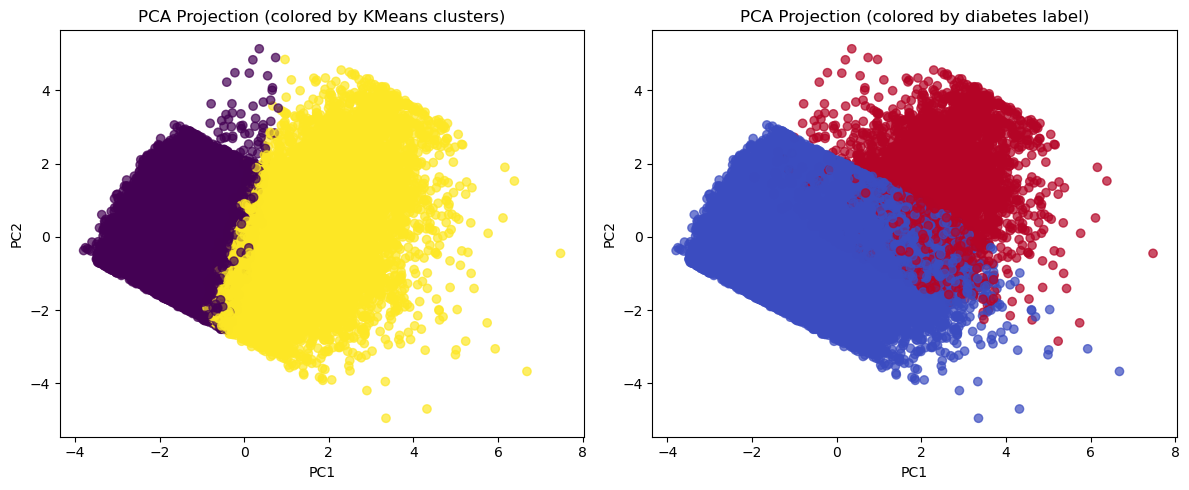

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 1. 加载数据
df = pd.read_csv("./data/diabetes_prediction_dataset.csv")
X = df.drop(columns="diabetes")
y = df["diabetes"]

# 2. 定义数值型和类别型变量
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# 3. 预处理
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols)
])

X_processed = preprocessor.fit_transform(X)

# 4. 聚类
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_processed)

# 5. PCA 降维到 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# 6. 可视化：颜色根据cluster
plt.figure(figsize=(12,5))

# subplot 1: 按照 KMeans 聚类结果着色
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title("PCA Projection (colored by KMeans clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# subplot 2: 按照 diabetes 标签着色
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA Projection (colored by diabetes label)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()
